In [222]:
import os
os.getcwd()

'C:\\Users\\Yogi\\Jupiter_notebooks'

In [223]:
# !pip install nsepy pandas numpy matplotlib treeinterpreter sklearn seaborn 

In [224]:
# Get 5 yrs data from NSE

from nsepy import get_history
from datetime import date
#data = get_history(symbol="NIFTY", start=date(2015,1,1), end=date(2020,5,23), index=True)
data = get_history(symbol="NIFTY", start=date(2015,1,1), end=date(2020,1,1), index=True)

In [225]:
data.describe

<bound method NDFrame.describe of                 Open      High       Low     Close     Volume      Turnover
Date                                                                       
2015-01-01   8272.80   8294.70   8248.75   8284.00   56560411  2.321880e+10
2015-01-02   8288.70   8410.60   8288.70   8395.45  101887024  4.715720e+10
2015-01-05   8407.95   8445.60   8363.90   8378.40  118160545  5.525520e+10
2015-01-06   8325.30   8327.85   8111.35   8127.35  172799618  8.089190e+10
2015-01-07   8118.65   8151.20   8065.45   8102.10  164075424  7.464330e+10
...              ...       ...       ...       ...        ...           ...
2019-12-26  12211.85  12221.55  12118.85  12126.55  520326632  1.636231e+11
2019-12-27  12172.90  12258.45  12157.90  12245.80  383788556  1.367620e+11
2019-12-30  12274.90  12286.45  12213.80  12255.85  411084614  1.455673e+11
2019-12-31  12247.10  12247.10  12151.80  12168.45  426931711  1.481289e+11
2020-01-01  12202.15  12222.20  12165.30  12182.50  30

In [226]:
# Convert data into panda datafram

df = pd.DataFrame(data)
X = df.values
X.shape
df.isnull().sum()
df.describe()
df.head()


,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2015-01-01,8272.80,8294.70,8248.75,8284.00,56560411,2.321880e+10
2015-01-02,8288.70,8410.60,8288.70,8395.45,101887024,4.715720e+10
2015-01-05,8407.95,8445.60,8363.90,8378.40,118160545,5.525520e+10
2015-01-06,8325.30,8327.85,8111.35,8127.35,172799618,8.089190e+10
2015-01-07,8118.65,8151.20,8065.45,8102.10,164075424,7.464330e+10


In [227]:
# Setup env for running ML

import pandas as pd
import numpy as np
import talib
from talib.abstract import *

import matplotlib as mpl
import matplotlib.pyplot as plt
from treeinterpreter import treeinterpreter as ti

mpl.style.use('ggplot')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from collections import Counter, OrderedDict, defaultdict
import operator
from pprint import pprint as pp

%matplotlib inline
np.random.seed(42)
pd.options.display.max_columns = None

In [228]:
# checkout datafram 

df.head()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2015-01-01,8272.80,8294.70,8248.75,8284.00,56560411,2.321880e+10
2015-01-02,8288.70,8410.60,8288.70,8395.45,101887024,4.715720e+10
2015-01-05,8407.95,8445.60,8363.90,8378.40,118160545,5.525520e+10
2015-01-06,8325.30,8327.85,8111.35,8127.35,172799618,8.089190e+10
2015-01-07,8118.65,8151.20,8065.45,8102.10,164075424,7.464330e+10


In [229]:
# Check there are no Nulls

df.isnull().sum()

Open        0
High        0
Low         0
Close       0
Volume      0
Turnover    0
dtype: int64

In [230]:
# Drop columns not needed

df.drop(['Turnover'], axis=1, inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-01,8272.80,8294.70,8248.75,8284.00,56560411
2015-01-02,8288.70,8410.60,8288.70,8395.45,101887024
2015-01-05,8407.95,8445.60,8363.90,8378.40,118160545
2015-01-06,8325.30,8327.85,8111.35,8127.35,172799618
2015-01-07,8118.65,8151.20,8065.45,8102.10,164075424


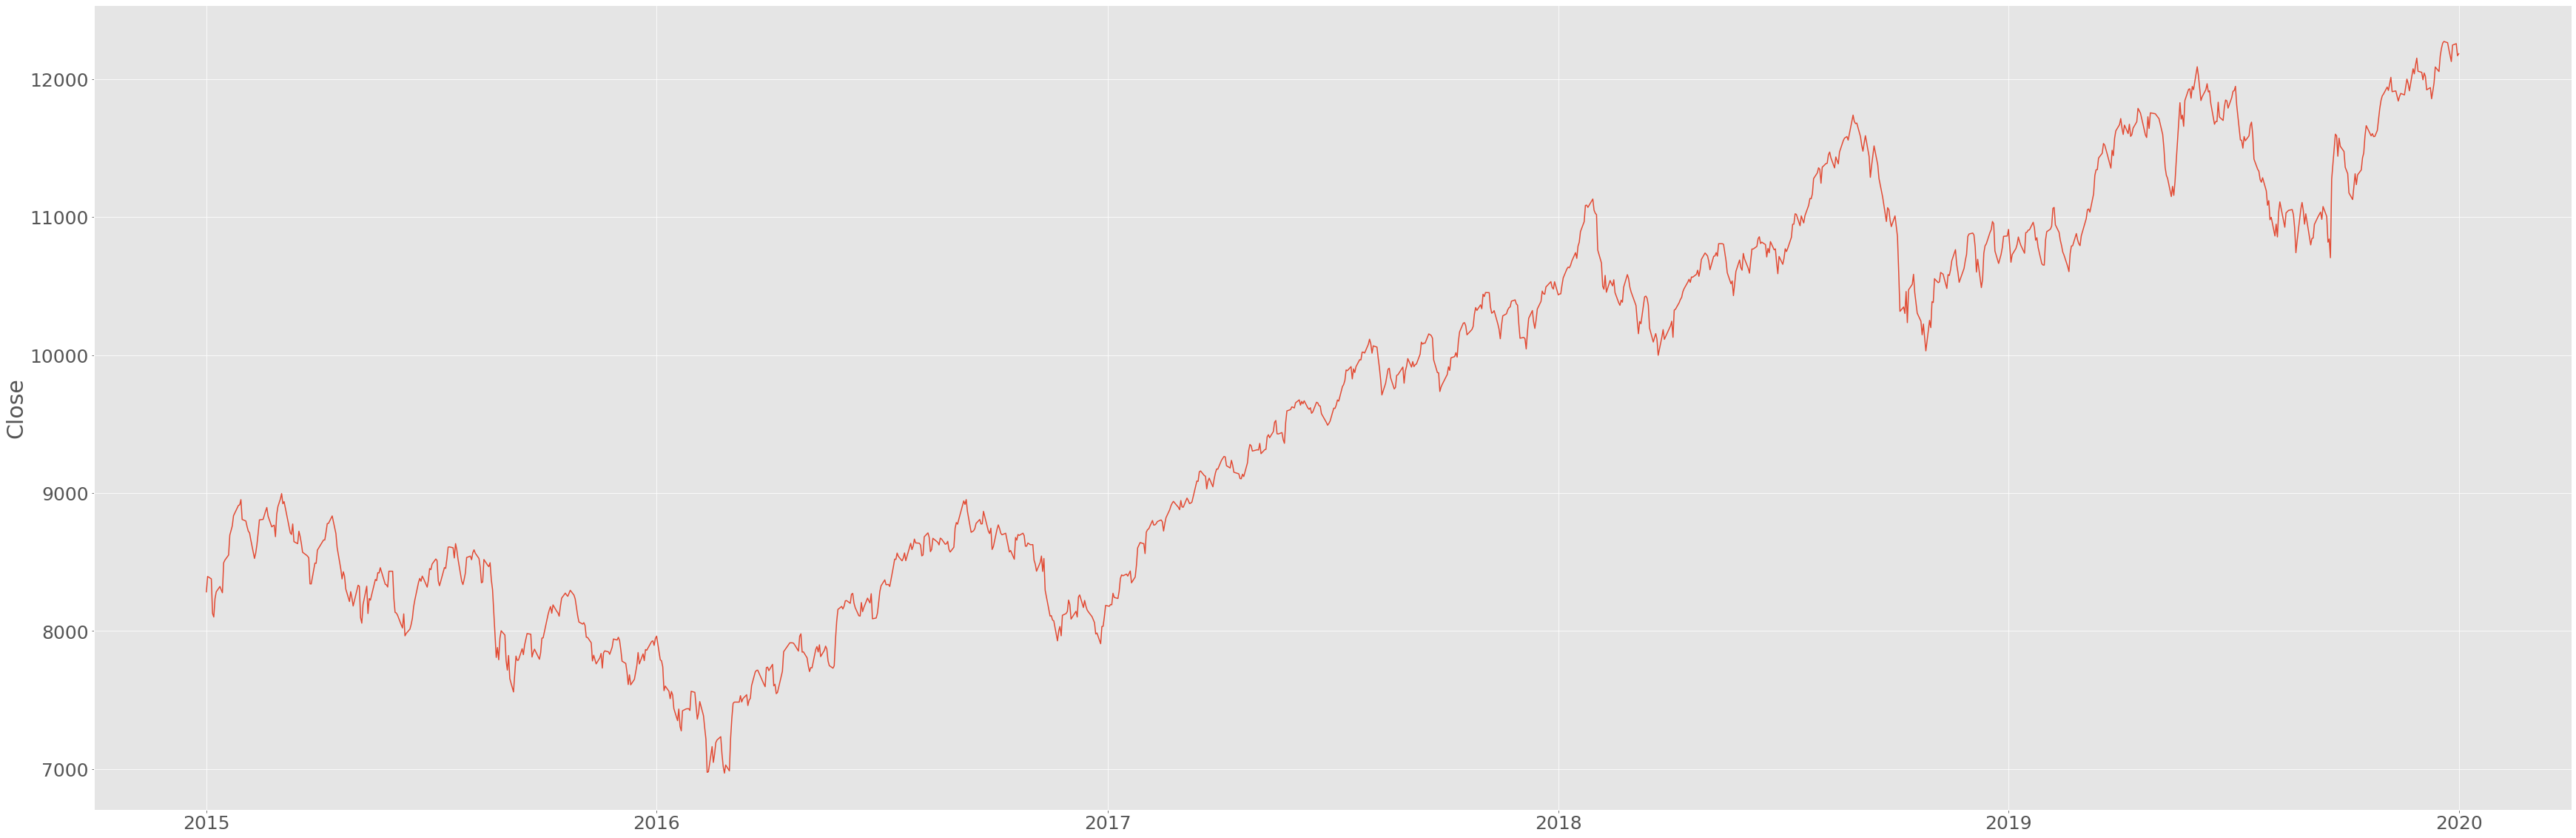

In [231]:
# Plot a line graph of data

for f in ['Close',]:
    plt.figure(figsize=(60,20))
    mpl.rcParams.update({'font.size': 25})
    plt.plot(getattr(df, f))
    plt.ylabel(f)
    plt.show()


In [232]:
# Get functions from talib

analysis = talib.get_function_groups()
# print function names
analysis

{'Cycle Indicators': ['HT_DCPERIOD',
  'HT_DCPHASE',
  'HT_PHASOR',
  'HT_SINE',
  'HT_TRENDMODE'],
 'Math Operators': ['ADD',
  'DIV',
  'MAX',
  'MAXINDEX',
  'MIN',
  'MININDEX',
  'MINMAX',
  'MINMAXINDEX',
  'MULT',
  'SUB',
  'SUM'],
 'Math Transform': ['ACOS',
  'ASIN',
  'ATAN',
  'CEIL',
  'COS',
  'COSH',
  'EXP',
  'FLOOR',
  'LN',
  'LOG10',
  'SIN',
  'SINH',
  'SQRT',
  'TAN',
  'TANH'],
 'Momentum Indicators': ['ADX',
  'ADXR',
  'APO',
  'AROON',
  'AROONOSC',
  'BOP',
  'CCI',
  'CMO',
  'DX',
  'MACD',
  'MACDEXT',
  'MACDFIX',
  'MFI',
  'MINUS_DI',
  'MINUS_DM',
  'MOM',
  'PLUS_DI',
  'PLUS_DM',
  'PPO',
  'ROC',
  'ROCP',
  'ROCR',
  'ROCR100',
  'RSI',
  'STOCH',
  'STOCHF',
  'STOCHRSI',
  'TRIX',
  'ULTOSC',
  'WILLR'],
 'Overlap Studies': ['BBANDS',
  'DEMA',
  'EMA',
  'HT_TRENDLINE',
  'KAMA',
  'MA',
  'MAMA',
  'MAVP',
  'MIDPOINT',
  'MIDPRICE',
  'SAR',
  'SAREXT',
  'SMA',
  'T3',
  'TEMA',
  'TRIMA',
  'WMA'],
 'Pattern Recognition': ['CDL2CROWS',
  'C

In [233]:
# Run analysis on 5 yrs data

inputs = {
    'open': df.Open,
    'high': df.High,
    'low': df.Low,
    'close': df.Close,
    'volume': df.Volume,
}

# + analysis['Momentum Indicators']
for f in analysis['Volatility Indicators'] + analysis['Statistic Functions'] + analysis['Price Transform']:
    print(f)
    output = getattr(talib.abstract, f)(inputs)
    if isinstance(output, np.ndarray):
        print(f)
        df[f] = output
    else:
        for i in range(len(output)):
            f_i = '%s_%s'%(f, i)
            print(f_i)
            df[f_i] = output[i]

ATR
ATR
NATR
NATR
TRANGE
TRANGE
BETA
BETA
CORREL
CORREL
LINEARREG
LINEARREG
LINEARREG_ANGLE
LINEARREG_ANGLE
LINEARREG_INTERCEPT
LINEARREG_INTERCEPT
LINEARREG_SLOPE
LINEARREG_SLOPE
STDDEV
STDDEV
TSF
TSF
VAR
VAR
AVGPRICE
AVGPRICE
MEDPRICE
MEDPRICE
TYPPRICE
TYPPRICE
WCLPRICE
WCLPRICE


In [234]:
# Check what data has been populated
df.head()

,Open,High,Low,Close,Volume,ATR,NATR,TRANGE,BETA,CORREL,LINEARREG,LINEARREG_ANGLE,LINEARREG_INTERCEPT,LINEARREG_SLOPE,STDDEV,TSF,VAR,AVGPRICE,MEDPRICE,TYPPRICE,WCLPRICE
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,8272.80,8294.70,8248.75,8284.00,56560411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8275.0625,8271.725,8275.816667,8277.8625
2015-01-02,8288.70,8410.60,8288.70,8395.45,101887024,NaN,NaN,126.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8345.8625,8349.650,8364.916667,8372.5500
2015-01-05,8407.95,8445.60,8363.90,8378.40,118160545,NaN,NaN,81.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8398.9625,8404.750,8395.966667,8391.5750
2015-01-06,8325.30,8327.85,8111.35,8127.35,172799618,NaN,NaN,267.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8222.9625,8219.600,8188.850000,8173.4750
2015-01-07,8118.65,8151.20,8065.45,8102.10,164075424,NaN,NaN,85.75,NaN,NaN,NaN,NaN,NaN,NaN,122.831134,NaN,15087.4874,8109.3500,8108.325,8106.250000,8105.2125


In [235]:
# Check data 
print(len(df))
print(len(df.columns))

1235
21


In [236]:
# Check last 30 days return
# Create a new column Returns_30day
#df['Returns_30day'] = df.Close.shift(30)/df.Close*100 -100
df['Returns_30day'] = df.Close.shift(15)/df.Close*100 -100
df['Returns_30day'].describe()

count    1220.000000
mean       -0.404631
std         3.253375
min        -9.497506
25%        -2.607514
50%        -0.783684
75%         1.270690
max        12.151400
Name: Returns_30day, dtype: float64

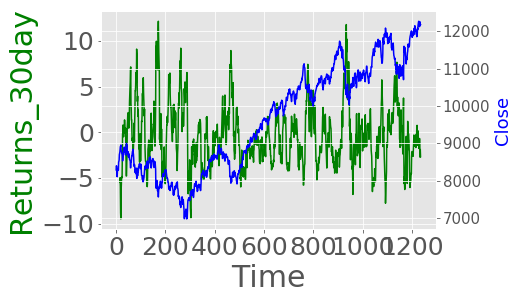

<Figure size 5760x2160 with 0 Axes>

In [237]:
# Plot 30 day rolling return chart

fig, ax1 = plt.subplots()
plt.figure(figsize=(80,30))

mpl.rcParams.update({'font.size': 15})
ax2 = ax1.twinx()

x = range(len(df))
ax1.plot(x, df.Returns_30day, 'g-')
ax2.plot(x, df.Close, 'b-')

ax1.set_xlabel('Time')
ax1.set_ylabel('Returns_30day', color='g')
ax2.set_ylabel('Close', color='b')

plt.show()

In [238]:
# Define class to find 5% or more returns

def assign_class(x):
    if x>=5:
        return 5
    elif x<=-5:
        return -5
    else:
        return np.trunc(x)
    
assign_class(-0.1)

-0.0

In [239]:
# Filter out 5% returns from 30 day rolling
df['Returns_30day'] = df.Returns_30day.apply(assign_class)

In [240]:
# This prepares data for creating training data
# Dropping unnecessary variables
df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)

# Dropping created variables
df.dropna(inplace=True)
df.to_csv('nifty_train_data.csv', index=False)
print('saved')

saved


In [241]:
df.head()

,ATR,NATR,TRANGE,BETA,CORREL,LINEARREG,LINEARREG_ANGLE,LINEARREG_INTERCEPT,LINEARREG_SLOPE,STDDEV,TSF,VAR,AVGPRICE,MEDPRICE,TYPPRICE,WCLPRICE,Returns_30day
Date,,,,,,,,,,,,,,,,,
2015-02-12,120.130816,1.378983,133.30,0.529872,0.983280,8580.540000,-87.806054,8919.874286,-26.102637,66.095791,8554.437363,4368.6536,8680.0750,8665.900,8681.116667,8688.7250,0.0
2015-02-13,119.446472,1.356498,110.55,0.865844,0.983668,8606.957143,-87.362442,8889.157143,-21.707692,100.859579,8585.249451,10172.6546,8774.6875,8775.875,8785.750000,8790.6875,-0.0
2015-02-16,116.393152,1.321246,76.70,-0.181358,0.983568,8645.924286,-86.082075,8835.740000,-14.601209,96.430030,8631.323077,9298.7506,8826.0625,8831.750,8824.283333,8820.5500,0.0
2015-02-18,114.179356,1.287384,85.40,-0.120294,0.983830,8703.688571,-79.150506,8771.518571,-5.217692,85.127860,8698.470879,7246.7526,8845.9625,8851.600,8857.433333,8860.3500,0.0
2015-02-19,114.523687,1.287463,119.00,1.158947,0.986987,8774.917143,81.074704,8692.140000,6.367473,63.480780,8781.284615,4029.8094,8871.5625,8853.950,8867.733333,8874.6250,0.0
